# Final Visualisation Report:- DATA HANDLING AND VISUALISATION

# Student ID:- 23035559

In [68]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [69]:


# Load the dataset
vgsales_data = pd.read_csv('vgsales.csv')

# Display the first few rows of the dataset 
vgsales_data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [70]:
#gathering information about the data
vgsales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [71]:
#to get the statistical figures

vgsales_data.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


### Data cleaning

In [72]:
# Check the number of missing values in each column
missing_values = vgsales_data.isnull().sum()

# Since the missing values are primarily in 'Year' and 'Publisher', we'll consider how to handle them:
# For 'Year', we'll drop the rows with missing years since they're crucial for trend analysis.
# For 'Publisher', missing values will also be dropped to maintain data integrity.

# Drop rows with missing values
vgsales_data_cleaned = vgsales_data.dropna()



In [73]:
# Verify the cleaning
cleaned_data_info = vgsales_data_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  float64
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [74]:
missing_values, cleaned_data_info

(Rank              0
 Name              0
 Platform          0
 Year            271
 Genre             0
 Publisher        58
 NA_Sales          0
 EU_Sales          0
 JP_Sales          0
 Other_Sales       0
 Global_Sales      0
 dtype: int64,
 None)

### Data Visualization

**I will begin by generating the time series plot for global sales trends.**



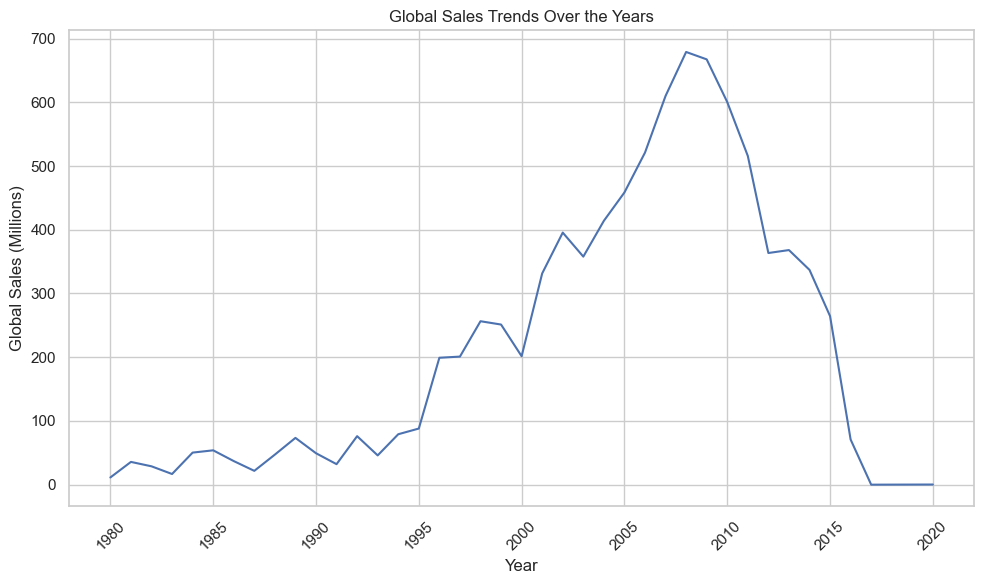

In [75]:


# Setting the style for the plots
sns.set(style="whitegrid")

# Create a time series plot for global sales trends over the years
plt.figure(figsize=(10, 6))
sns.lineplot(data=vgsales_data_cleaned, x='Year', y='Global_Sales', estimator=sum, ci=None)
plt.title('Global Sales Trends Over the Years')
plt.xlabel('Year')
plt.ylabel('Global Sales (Millions)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The time series plot above illustrates the trend of global video game sales over the years. We can see significant peaks, suggesting periods of high popularity or successful game releases.

**Total sales by region—to compare how different markets contribute to the sales.**

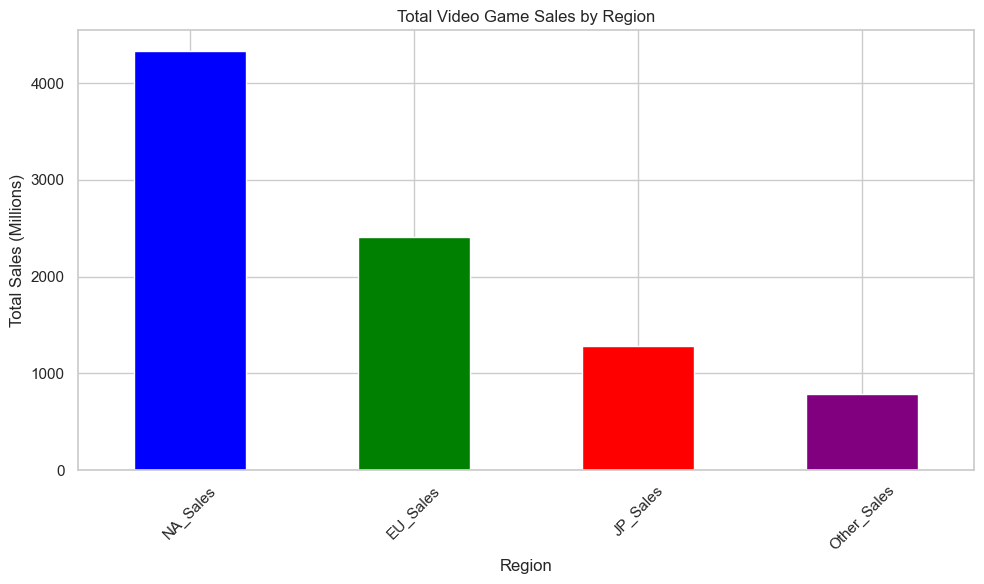

In [56]:
# Create bar charts for total sales by region
regions = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']

plt.figure(figsize=(10, 6))
vgsales_data_cleaned[regions].sum().plot(kind='bar', color=['blue', 'green', 'red', 'purple'])
plt.title('Total Video Game Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales (Millions)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


*The bar chart clearly shows the total video game sales by region, indicating that North America (NA) has the highest sales, followed by Europe (EU), and other regions.*

**Total sales by platform—to identify which gaming platforms are the most popular in terms of sales.**

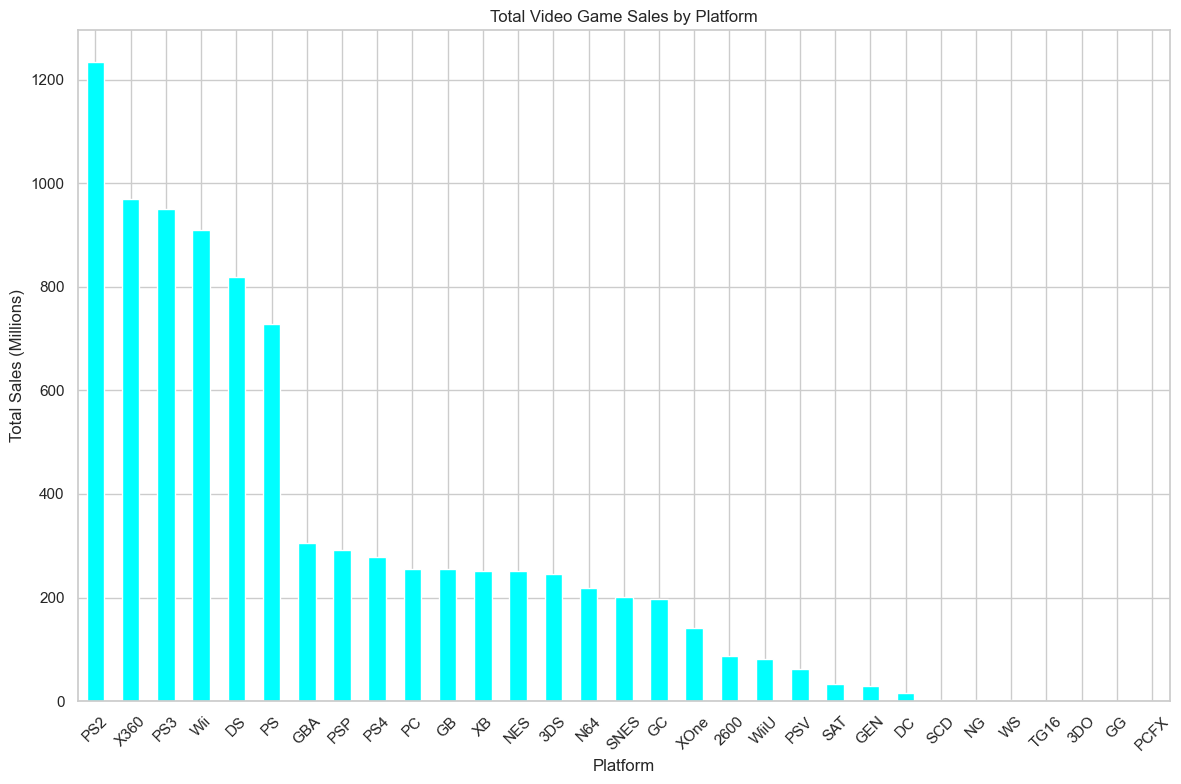

In [57]:
# Create bar charts for total sales by platform
plt.figure(figsize=(12, 8))
platform_sales = vgsales_data_cleaned.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False)
platform_sales.plot(kind='bar', color='cyan')
plt.title('Total Video Game Sales by Platform')
plt.xlabel('Platform')
plt.ylabel('Total Sales (Millions)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


*This bar chart displays the total video game sales by platform, showing the platforms with the highest cumulative global sales. It's evident that some platforms are significantly more successful than others.*

--> **creating a pie chart to visualize the distribution of game genres within the dataset. This will help us understand the popularity and market share of each genre.**

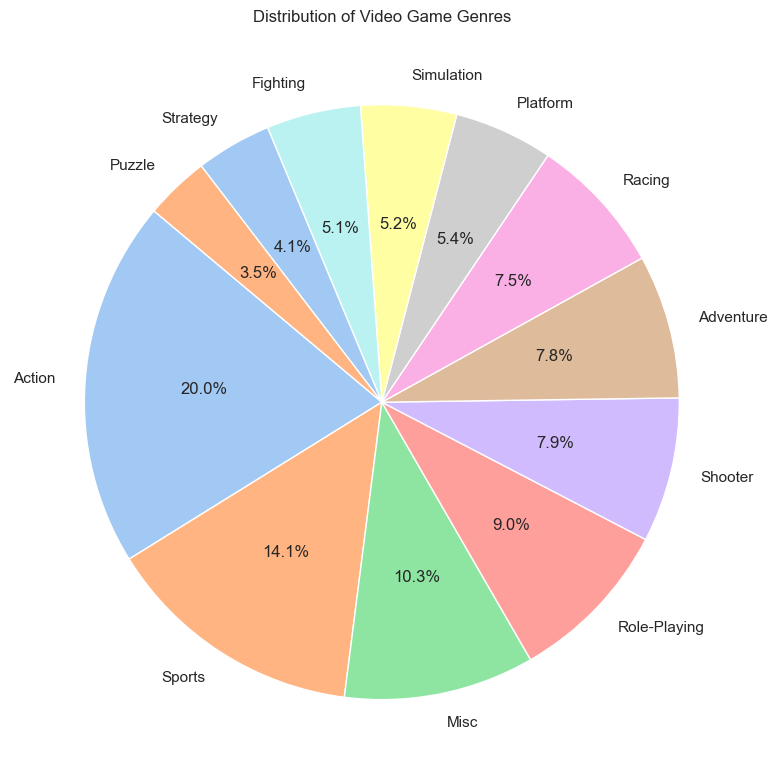

In [58]:
# Create a pie chart for the distribution of game genres
plt.figure(figsize=(10, 8))
genre_distribution = vgsales_data_cleaned['Genre'].value_counts()
genre_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Distribution of Video Game Genres')
plt.ylabel('')  # Hide the y-label as it's not necessary for a pie chart
plt.tight_layout()
plt.show()


*The pie chart illustrates the distribution of video game genres, indicating the relative popularity of each genre. This visualization can help identify trends in consumer preferences over the dataset's time frame.*

**compiled a summary table showing key statistics for each genre, such as average sales across regions and globally. This table will provide a concise overview of genre performance.**

In [59]:
# Create a summary table for sales statistics by genre
genre_stats = vgsales_data_cleaned.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].mean()
genre_stats = genre_stats.sort_values(by='Global_Sales', ascending=False)

# Display the table
genre_stats


,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Genre,,,,,
Platform,0.509703,0.229314,0.149314,0.058869,0.947577
Shooter,0.448643,0.242161,0.029782,0.079485,0.800468
Role-Playing,0.222109,0.127599,0.238293,0.040395,0.628456
Racing,0.291371,0.192906,0.046212,0.062596,0.593273
Sports,0.290838,0.161172,0.058490,0.057574,0.568247
Fighting,0.264043,0.119617,0.104246,0.043289,0.531160
Action,0.265078,0.158868,0.048800,0.056881,0.529942
Misc,0.235421,0.125605,0.063268,0.043843,0.468488
Simulation,0.214363,0.133278,0.074929,0.036981,0.459882


*Here's the summary table displaying the average sales (in millions) by genre across different regions and globally.*

**Let's start with the boxplot to analyze the distribution of sales across genres.**



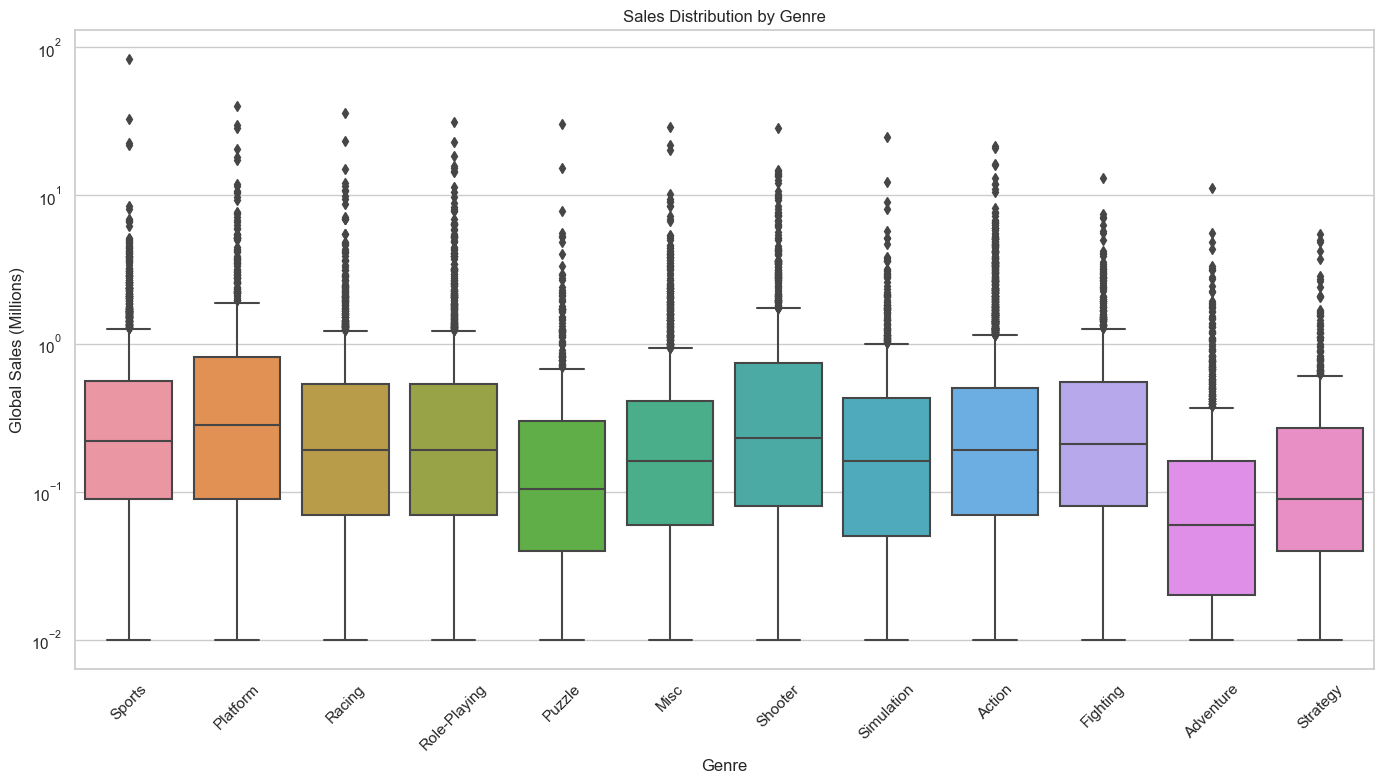

In [60]:
# Create boxplot for sales distributions by genre
plt.figure(figsize=(14, 8))
sns.boxplot(data=vgsales_data_cleaned, x='Genre', y='Global_Sales')
plt.title('Sales Distribution by Genre')
plt.xlabel('Genre')
plt.ylabel('Global Sales (Millions)')
plt.xticks(rotation=45)
plt.yscale('log')  # Use log scale to better display distributions
plt.tight_layout()
plt.show()


*The boxplot above displays the distribution of global sales by genre, using a logarithmic scale to manage the wide range of values and highlight the distribution characteristics, such as medians and outliers.*

 **creating a heatmap to visualize the correlation between sales in different regions. This can reveal how sales performances are related across North America, Europe, Japan, and other regions.**

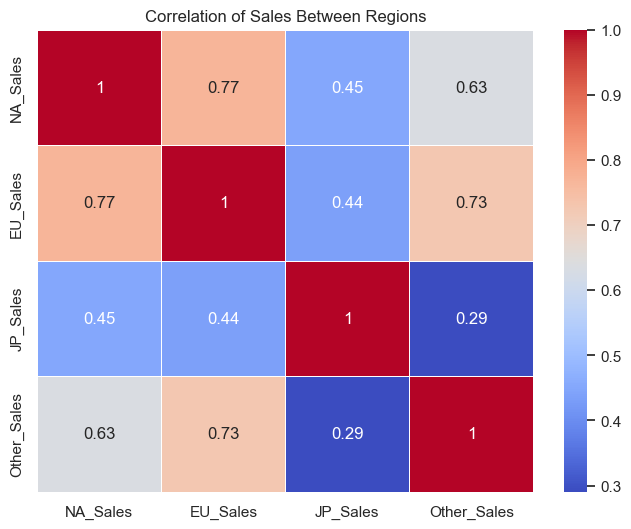

In [61]:
# Create a heatmap for correlation of sales between regions
sales_data = vgsales_data_cleaned[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
correlation_matrix = sales_data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation of Sales Between Regions')
plt.show()


*The heatmap displays the correlation coefficients between sales in different regions, helping to identify how sales performances are interrelated. For instance, we can see how North American sales correlate with European sales, and so on.*

**create a scatter plot to examine the relationship between North American (NA) sales and global sales. This plot will help us understand how sales in North America contribute to global sales figures.**

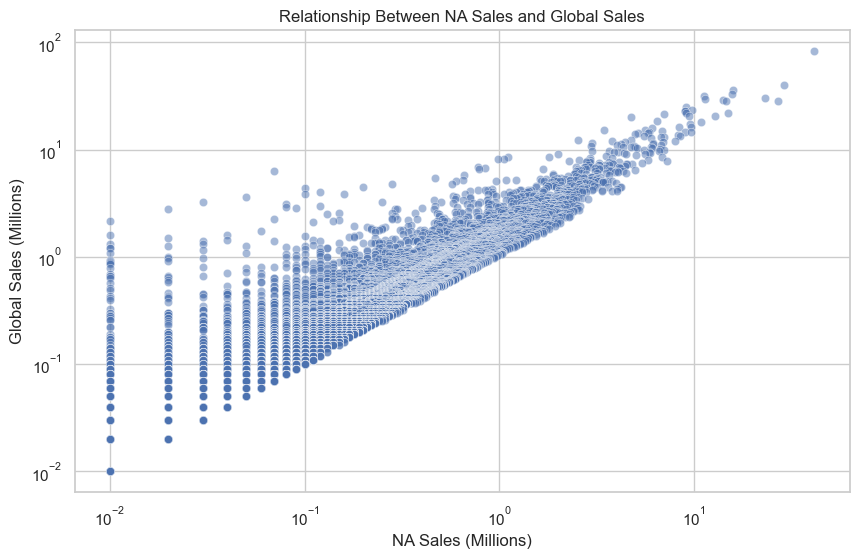

In [62]:
# Create a scatter plot for the relationship between NA Sales and Global Sales
plt.figure(figsize=(10, 6))
sns.scatterplot(data=vgsales_data_cleaned, x='NA_Sales', y='Global_Sales', alpha=0.5)
plt.title('Relationship Between NA Sales and Global Sales')
plt.xlabel('NA Sales (Millions)')
plt.ylabel('Global Sales (Millions)')
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.show()


*The scatter plot above, using logarithmic scales for both axes, shows the relationship between North American sales and global sales. It helps us see how closely the sales in North America predict global sales patterns.*

**create a violin plot to visualize the distribution of sales by platform, focusing on both density and distribution shape to provide a deeper understanding of sales performance across various gaming platforms.**

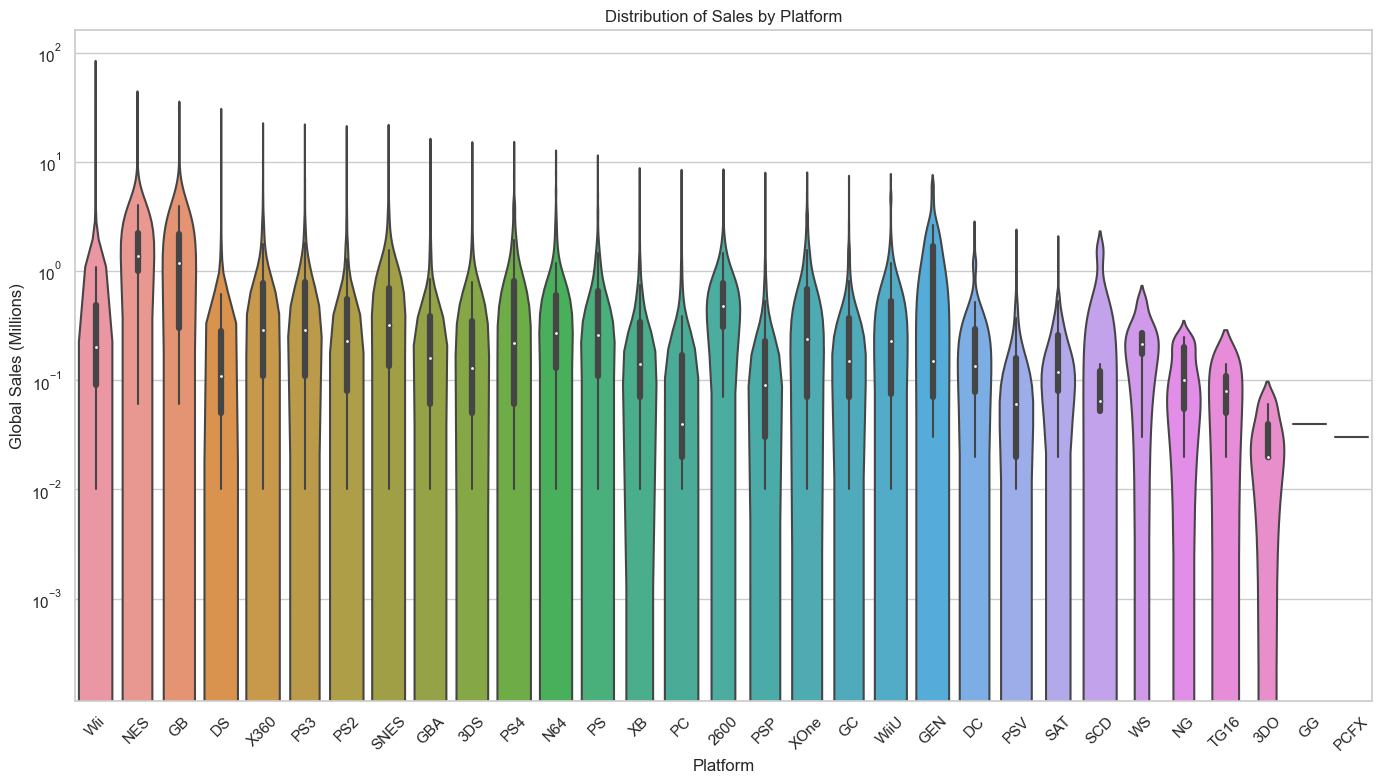

In [63]:
# Create a violin plot for distribution of sales by platform
plt.figure(figsize=(14, 8))
sns.violinplot(data=vgsales_data_cleaned, x='Platform', y='Global_Sales', scale='width')
plt.title('Distribution of Sales by Platform')
plt.xlabel('Platform')
plt.ylabel('Global Sales (Millions)')
plt.xticks(rotation=45)
plt.yscale('log')
plt.tight_layout()
plt.show()


*The violin plot provides a detailed look at the sales distribution by platform, showing the density and shape of the distribution for each platform, which helps in understanding where most sales data points fall and how spread out they are.*

**For a different perspective, I create a stacked bar chart to examine sales by genre across different regions. This will help us visualize how different genres perform across North America, Europe, Japan, and other regions.**

<Figure size 1400x800 with 0 Axes>

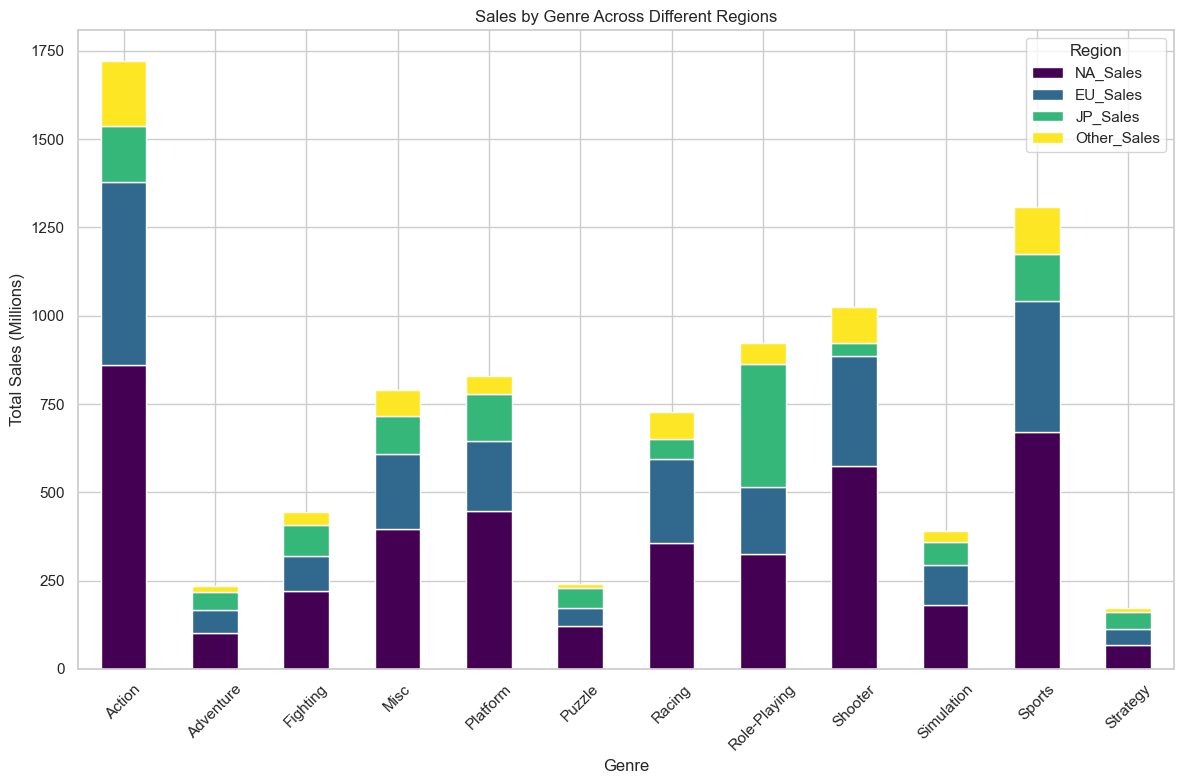

In [64]:
# Create a stacked bar chart for sales by genre across different regions
genre_region_sales = vgsales_data_cleaned.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

plt.figure(figsize=(14, 8))
genre_region_sales.plot(kind='bar', stacked=True, colormap='viridis', figsize=(12, 8))
plt.title('Sales by Genre Across Different Regions')
plt.xlabel('Genre')
plt.ylabel('Total Sales (Millions)')
plt.xticks(rotation=45)
plt.legend(title='Region')
plt.tight_layout()
plt.show()


*The stacked bar chart clearly illustrates the total sales by genre across different regions, showing the relative contributions of each region to the sales of various game genres. This visualization helps in understanding regional preferences and market trends for each genre.*

**Look at the distribution of global sales with a histogram, which will give us insights into the volume density and distribution of sales across all games.**

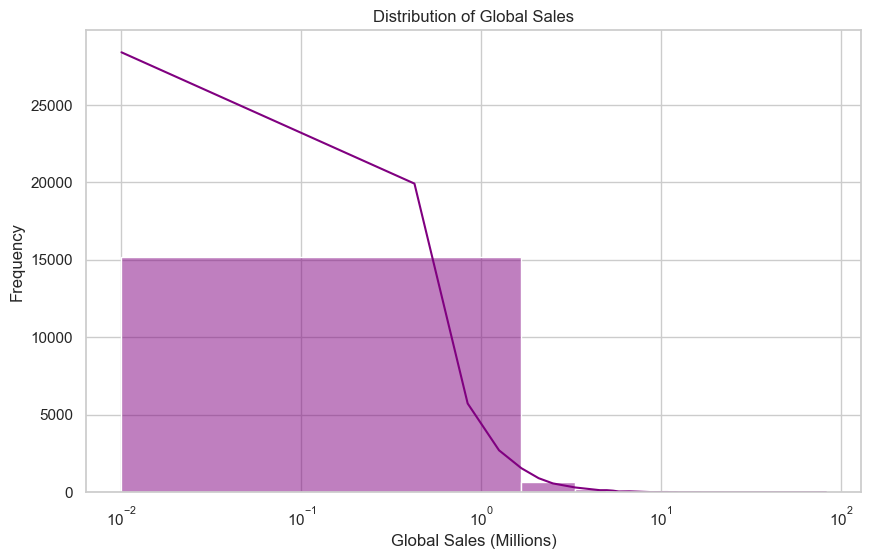

In [65]:
# Create a histogram for the distribution of global sales
plt.figure(figsize=(10, 6))
sns.histplot(vgsales_data_cleaned['Global_Sales'], bins=50, color='purple', kde=True)
plt.title('Distribution of Global Sales')
plt.xlabel('Global Sales (Millions)')
plt.ylabel('Frequency')
plt.xscale('log')  # Using log scale due to wide range of values
plt.grid(True)
plt.show()


*The histogram above displays the distribution of global sales, using a logarithmic scale to manage the wide range of sales values. The kernel density estimate (KDE) overlay provides a smooth estimate of the distribution, highlighting the concentration of games with lower sales and the long tail of higher-selling titles.*

**an area plot to visualize trends over time for the top-selling genres. This will help us understand how the popularity of these genres has evolved over the years**

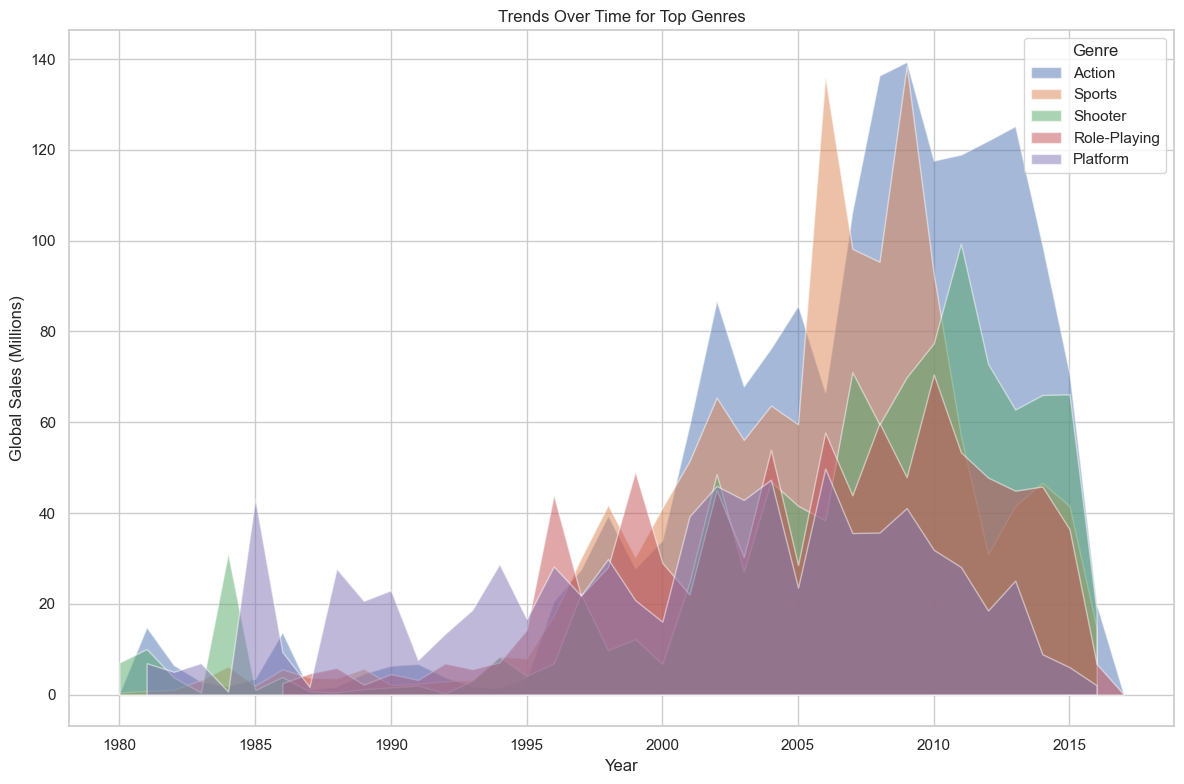

In [77]:
# Filter data for the top 5 genres by global sales
top_genres = vgsales_data_cleaned.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False).head(5).index
top_genres_data = vgsales_data_cleaned[vgsales_data_cleaned['Genre'].isin(top_genres)]

# Create an area plot for trends over time for top genres
plt.figure(figsize=(12, 8))
for genre in top_genres:
    yearly_data = top_genres_data[top_genres_data['Genre'] == genre].groupby('Year')['Global_Sales'].sum()
    plt.fill_between(yearly_data.index, yearly_data.values, label=genre, alpha=0.5)

plt.title('Trends Over Time for Top Genres')
plt.xlabel('Year')
plt.ylabel('Global Sales (Millions)')
plt.legend(title='Genre')
plt.grid(True)
plt.tight_layout()
plt.show()


*The area plot above visualizes trends over time for the top genres in terms of global sales. This visualization helps to track the rise and fall in popularity of these genres over the years, illustrating how consumer preferences may have shifted.*

# Guided By:- Dr Michael Kuhn

# Submitted BY:- Deepak Vishwakarma